In [ ]:
import warnings
warnings.filterwarnings('ignore')

Dataset Link: https://www.kaggle.com/datasets/albertobircoci/historical-prices-of-major-natural-resource/data

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
files.upload()

Saving Futures_Resources_Data.csv to Futures_Resources_Data.csv


{'Futures_Resources_Data.csv': b'Date,CL=F_closing_price,BZ=F_closing_price,GC=F_closing_price,SI=F_closing_price,NG=F_closing_price,ZC=F_closing_price,ZW=F_closing_price,ZS=F_closing_price,HG=F_closing_price,PL=F_closing_price,PA=F_closing_price\r\n29/10/1997,,,,,,,,,,402.7000122070313,\r\n30/10/1997,,,,,,,,,,405.2999877929688,\r\n31/10/1997,,,,,,,,,,404.2000122070313,\r\n03/11/1997,,,,,,,,,,406.5,\r\n04/11/1997,,,,,,,,,,405.7000122070313,\r\n05/11/1997,,,,,,,,,,404.5,\r\n06/11/1997,,,,,,,,,,389.0,\r\n07/11/1997,,,,,,,,,,389.0,\r\n10/11/1997,,,,,,,,,,387.3999938964844,\r\n11/11/1997,,,,,,,,,,389.2999877929688,\r\n12/11/1997,,,,,,,,,,391.0,\r\n13/11/1997,,,,,,,,,,386.7000122070313,\r\n14/11/1997,,,,,,,,,,384.0,\r\n17/11/1997,,,,,,,,,,385.5,\r\n18/11/1997,,,,,,,,,,392.7999877929688,\r\n19/11/1997,,,,,,,,,,393.0,\r\n20/11/1997,,,,,,,,,,392.2000122070313,\r\n21/11/1997,,,,,,,,,,389.0,\r\n24/11/1997,,,,,,,,,,386.5,\r\n25/11/1997,,,,,,,,,,379.7999877929688,\r\n26/11/1997,,,,,,,,,,383.299987

In [ ]:
# Load the dataset
file_path = 'Futures_Resources_Data.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
df.head()


Dataset Shape: (6905, 12)

Column Names: ['Date', 'CL=F_closing_price', 'BZ=F_closing_price', 'GC=F_closing_price', 'SI=F_closing_price', 'NG=F_closing_price', 'ZC=F_closing_price', 'ZW=F_closing_price', 'ZS=F_closing_price', 'HG=F_closing_price', 'PL=F_closing_price', 'PA=F_closing_price']


,Date,CL=F_closing_price,BZ=F_closing_price,GC=F_closing_price,SI=F_closing_price,NG=F_closing_price,ZC=F_closing_price,ZW=F_closing_price,ZS=F_closing_price,HG=F_closing_price,PL=F_closing_price,PA=F_closing_price
0,29/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402.700012,NaN
1,30/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.299988,NaN
2,31/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404.200012,NaN
3,03/11/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.500000,NaN
4,04/11/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.700012,NaN


In [ ]:
import pandas as pd

# Load dataset
file_path = 'Futures_Resources_Data.csv'
df = pd.read_csv(file_path)

# Show basic info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6905 non-null   object 
 1   CL=F_closing_price  6177 non-null   float64
 2   BZ=F_closing_price  4395 non-null   float64
 3   GC=F_closing_price  6168 non-null   float64
 4   SI=F_closing_price  6170 non-null   float64
 5   NG=F_closing_price  6174 non-null   float64
 6   ZC=F_closing_price  6181 non-null   float64
 7   ZW=F_closing_price  6193 non-null   float64
 8   ZS=F_closing_price  6173 non-null   float64
 9   HG=F_closing_price  6173 non-null   float64
 10  PL=F_closing_price  6196 non-null   float64
 11  PA=F_closing_price  6208 non-null   float64
dtypes: float64(11), object(1)
memory usage: 647.5+ KB
None


,Date,CL=F_closing_price,BZ=F_closing_price,GC=F_closing_price,SI=F_closing_price,NG=F_closing_price,ZC=F_closing_price,ZW=F_closing_price,ZS=F_closing_price,HG=F_closing_price,PL=F_closing_price,PA=F_closing_price
0,29/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402.700012,NaN
1,30/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.299988,NaN
2,31/10/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404.200012,NaN
3,03/11/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.500000,NaN
4,04/11/1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.700012,NaN


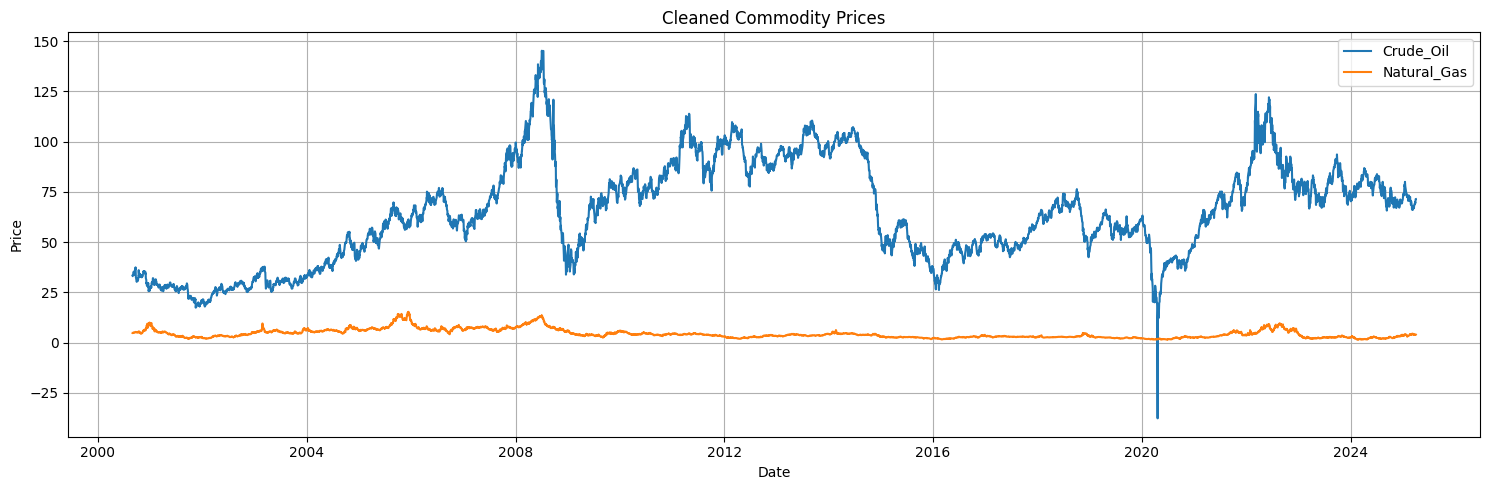

Final shape: (6172, 2)


,Crude_Oil,Natural_Gas
Date,,
2025-03-26,69.650002,3.861
2025-03-27,69.919998,3.950
2025-03-28,69.360001,4.065
2025-03-31,71.480003,4.119
2025-04-01,71.489998,4.069


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Futures_Resources_Data.csv'
df = pd.read_csv(file_path)

# Parse dates
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Keep only the relevant columns
df_arima = df[['CL=F_closing_price', 'NG=F_closing_price']]
df_arima.columns = ['Crude_Oil', 'Natural_Gas']

# Drop rows with missing values
df_arima = df_arima.dropna()

# Visualize cleaned data
plt.figure(figsize=(15, 5))
for col in df_arima.columns:
    plt.plot(df_arima[col], label=col)
plt.title('Cleaned Commodity Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show the final shape
print("Final shape:", df_arima.shape)
df_arima.tail()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'Futures_Resources_Data.csv'
df = pd.read_csv(file_path)

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Select target columns and rename
df = df[['CL=F_closing_price', 'NG=F_closing_price']]
df.columns = ['Crude_Oil', 'Natural_Gas']

# Drop missing values
df.dropna(inplace=True)

# Show data info
print("Dataset shape:", df.shape)
print("Date range:", df.index.min(), "to", df.index.max())
df.tail()


Dataset shape: (6172, 2)
Date range: 2000-08-30 00:00:00 to 2025-04-01 00:00:00


,Crude_Oil,Natural_Gas
Date,,
2025-03-26,69.650002,3.861
2025-03-27,69.919998,3.950
2025-03-28,69.360001,4.065
2025-03-31,71.480003,4.119
2025-04-01,71.489998,4.069


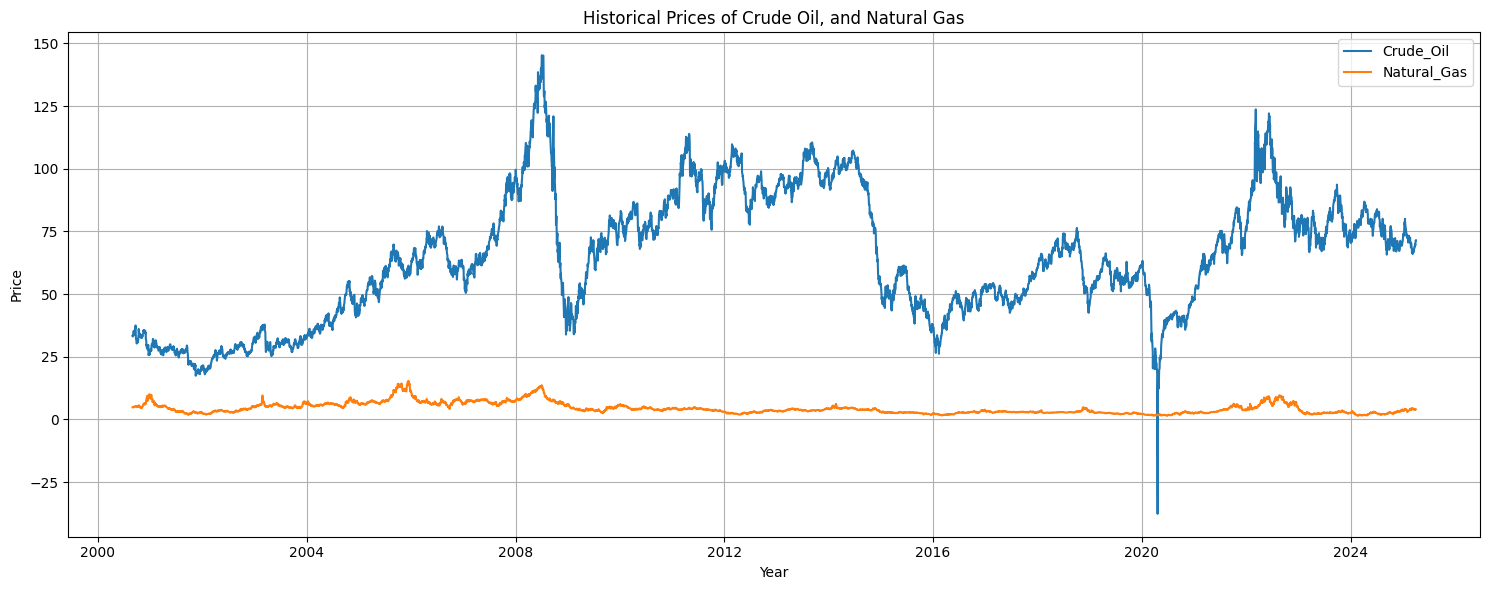

In [ ]:
plt.figure(figsize=(15, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.title("Historical Prices of Crude Oil, and Natural Gas")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


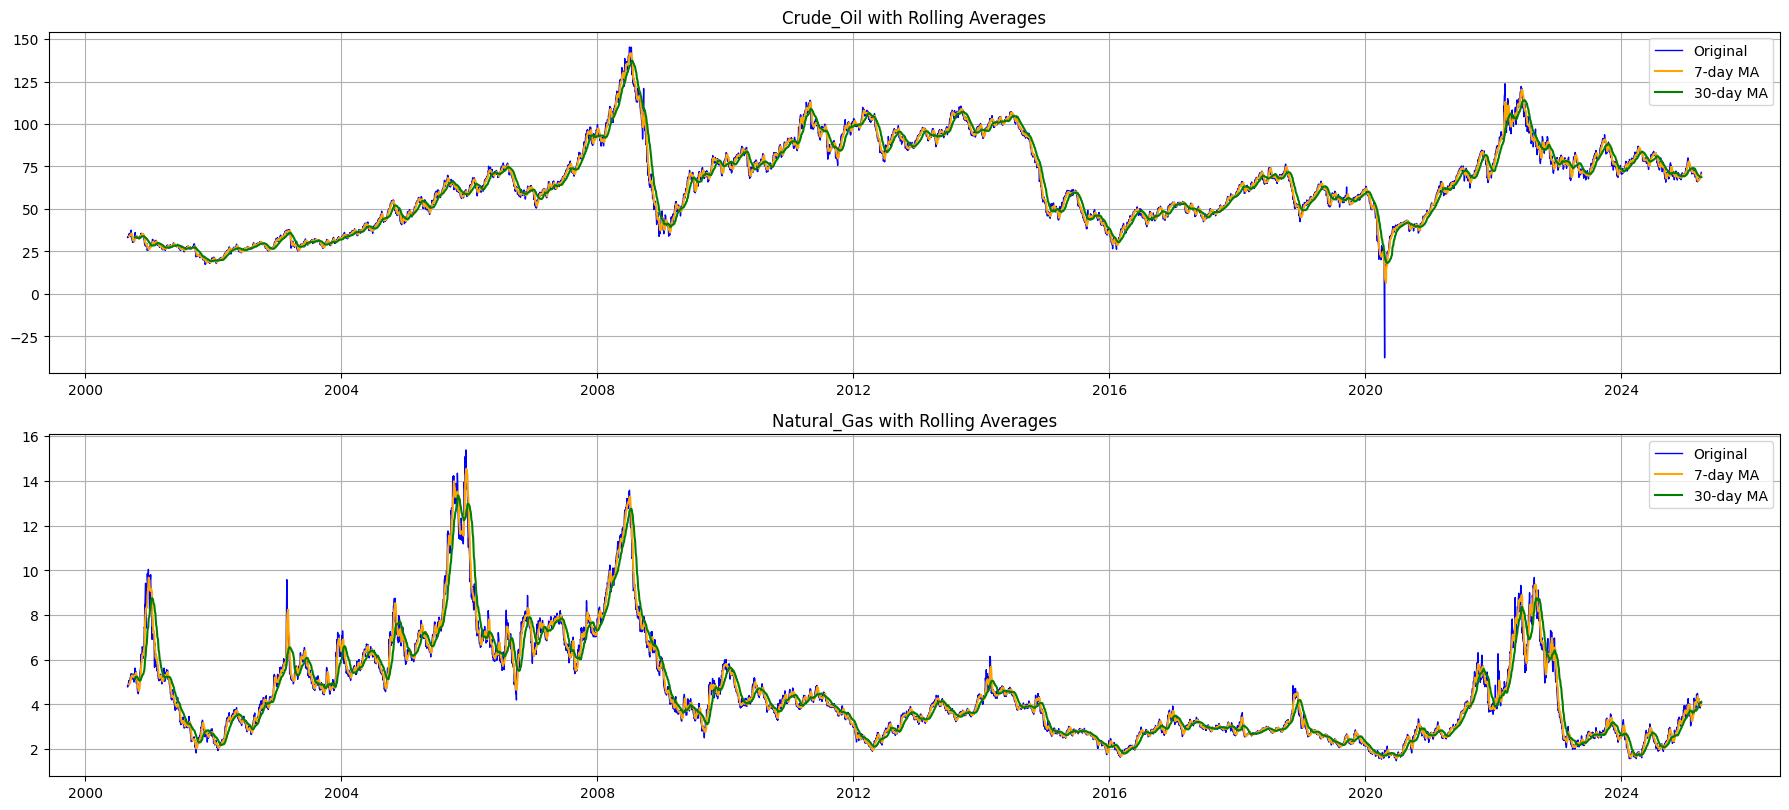

In [ ]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(df.columns):
    plt.subplot(3, 1, i+1)
    plt.plot(df[col], label='Original', color='blue', linewidth=1)
    plt.plot(df[col].rolling(window=7).mean(), label='7-day MA', color='orange')
    plt.plot(df[col].rolling(window=30).mean(), label='30-day MA', color='green')
    plt.title(f'{col} with Rolling Averages')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


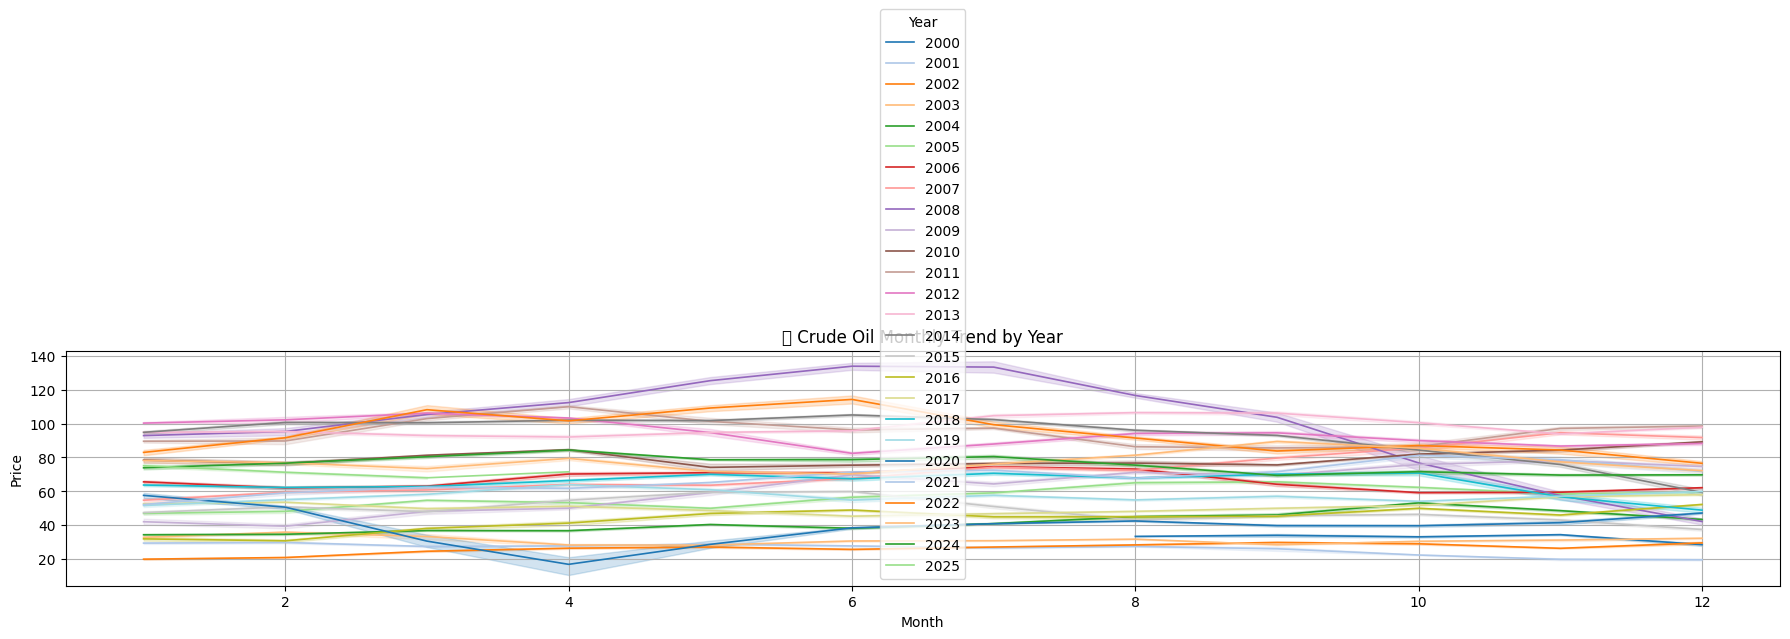

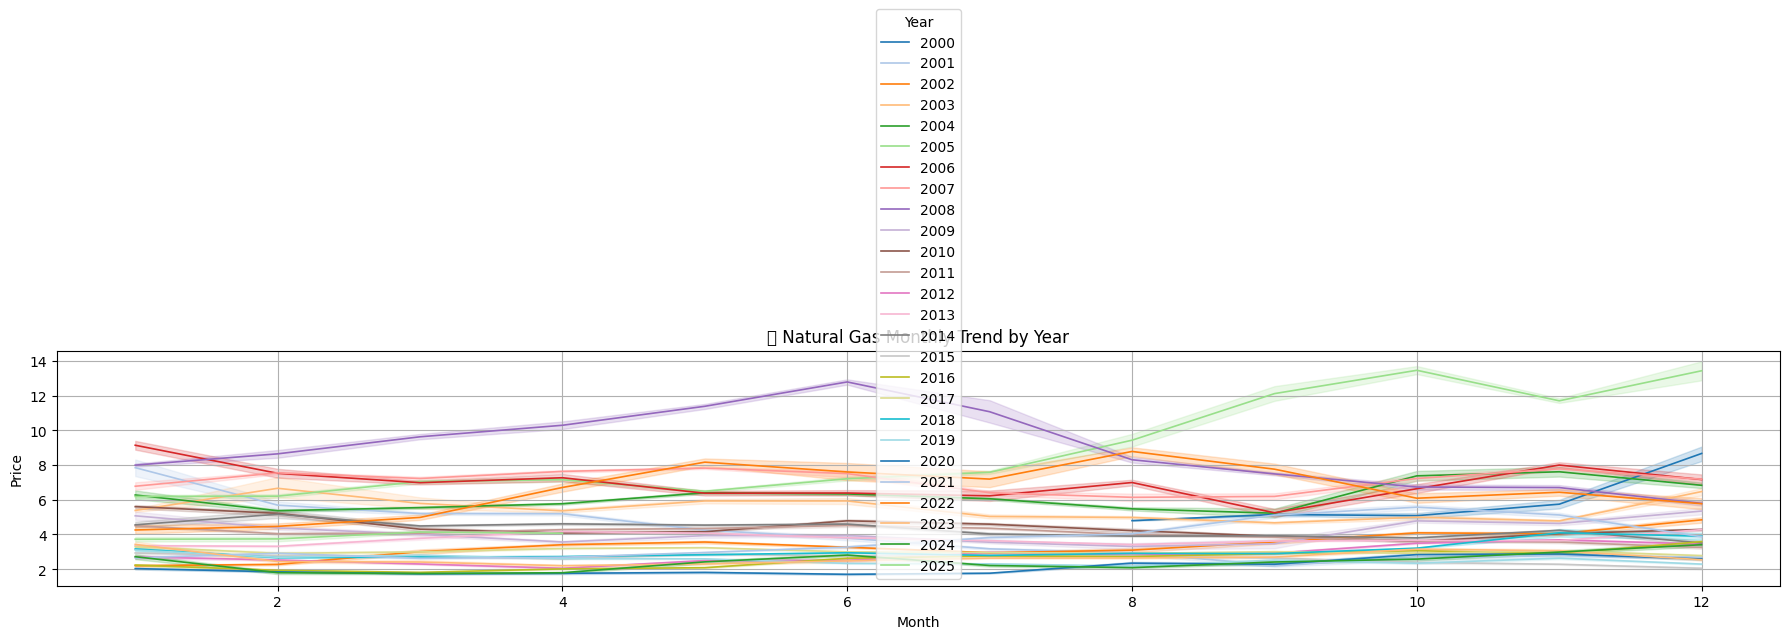

In [ ]:
# Add 'Year' and 'Month' columns
df_yearly = df.copy()
df_yearly['Year'] = df_yearly.index.year
df_yearly['Month'] = df_yearly.index.month

# Plot for Crude Oil
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_yearly, x='Month', y='Crude_Oil', hue='Year', palette='tab20', linewidth=1.2)
plt.title('📈 Crude Oil Monthly Trend by Year')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot for Natural Gas
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_yearly, x='Month', y='Natural_Gas', hue='Year', palette='tab20', linewidth=1.2)
plt.title('📈 Natural Gas Monthly Trend by Year')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


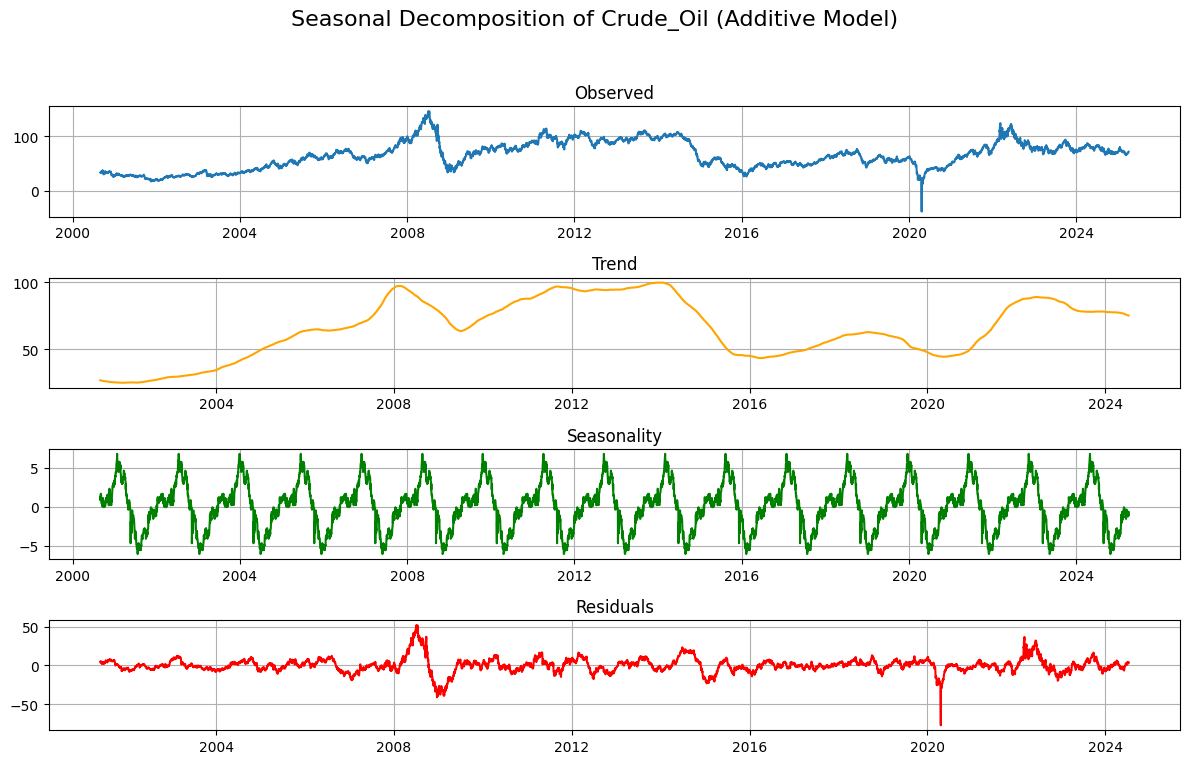

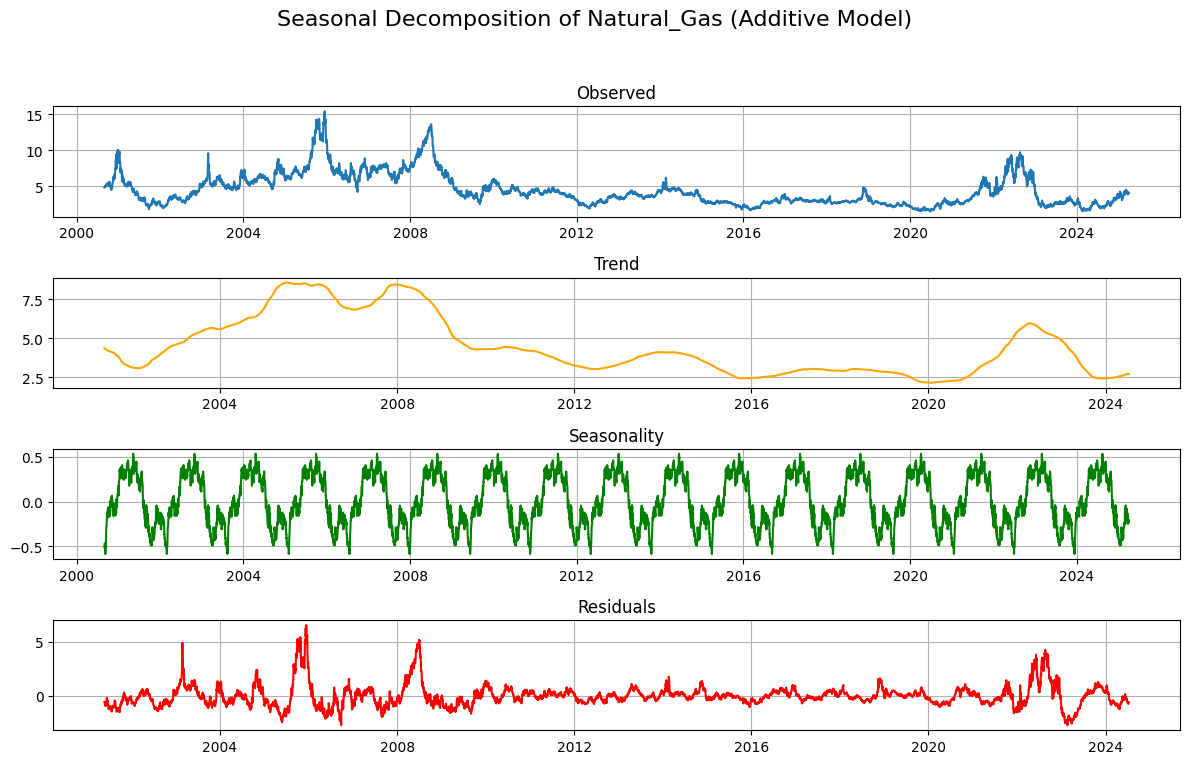

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

for col in df.columns:
    series = df[col].dropna()  # Drop missing values to avoid error
    if len(series) >= 730:     # Require at least 2 years of data for seasonal decomposition
        decomposition = seasonal_decompose(series, model='additive', period=365)

        plt.figure(figsize=(12, 8))
        plt.suptitle(f'Seasonal Decomposition of {col} (Additive Model)', fontsize=16)

        plt.subplot(411)
        plt.plot(decomposition.observed, label='Observed')
        plt.title('Observed')
        plt.grid(True)

        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend', color='orange')
        plt.title('Trend')
        plt.grid(True)

        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonal', color='green')
        plt.title('Seasonality')
        plt.grid(True)

        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residual', color='red')
        plt.title('Residuals')
        plt.grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


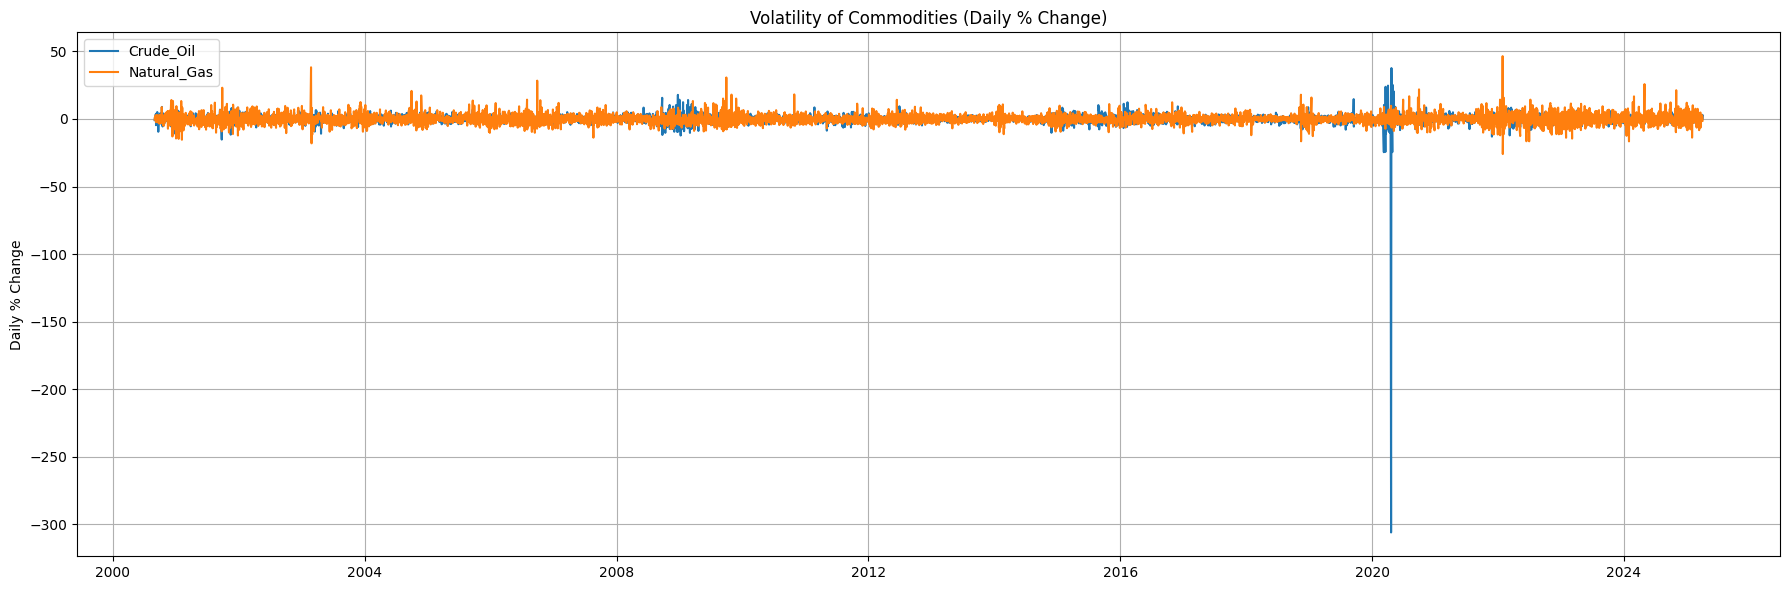

In [ ]:
returns = df.pct_change().dropna() * 100  # percentage change

plt.figure(figsize=(18, 6))
for col in returns.columns:
    plt.plot(returns[col], label=col)
plt.title("Volatility of Commodities (Daily % Change)")
plt.ylabel("Daily % Change")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



=== Processing: Crude Oil ===
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Metrics for Crude Oil:
  RMSE: 5.00
  MAE: 3.74
  R² Score: 0.9180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


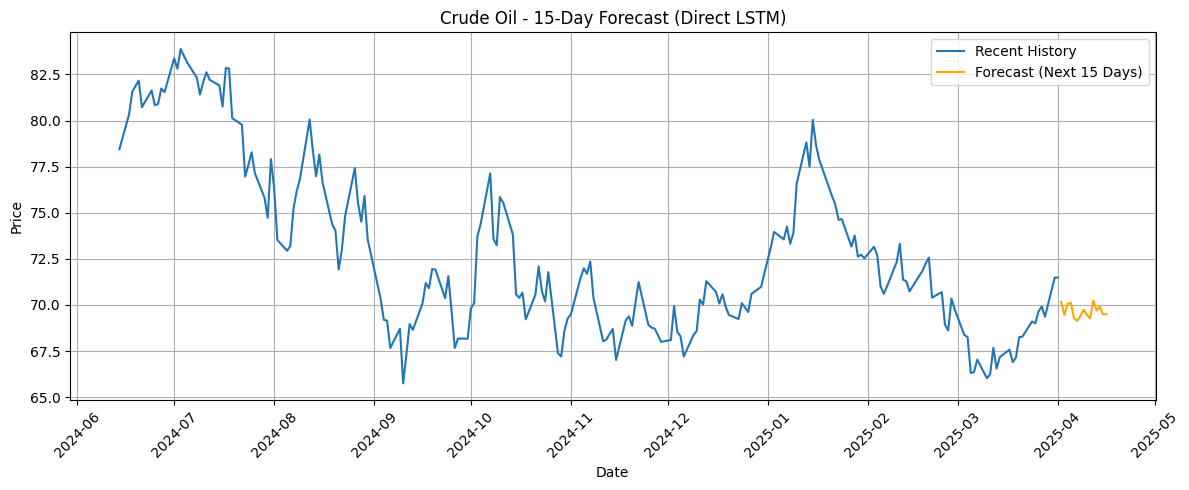


=== Processing: Natural Gas ===
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Metrics for Natural Gas:
  RMSE: 0.54
  MAE: 0.35
  R² Score: 0.9140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


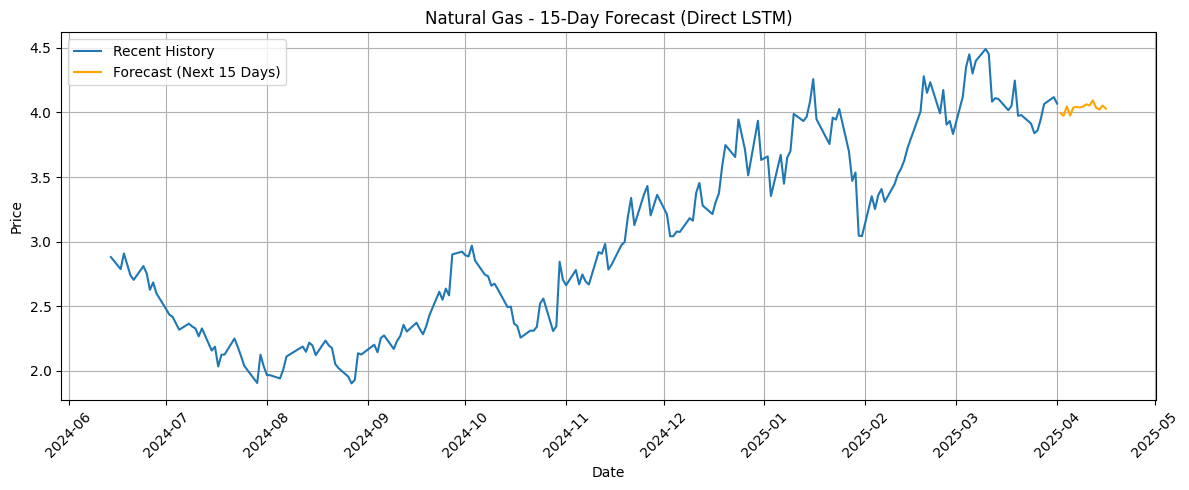

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load and prepare data
df = pd.read_csv('Futures_Resources_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Commodity map
commodity_map = {
    'Crude Oil': 'CL=F_closing_price',
    'Natural Gas': 'NG=F_closing_price'
}

# Create direct multi-output sequences
def create_multistep_sequences(data, input_len=60, output_len=15):
    X, y = [], []
    for i in range(input_len, len(data) - output_len):
        X.append(data[i - input_len:i])
        y.append(data[i:i + output_len])
    return np.array(X), np.array(y)

# Forecast for each commodity
for label, col in commodity_map.items():
    print(f"\n=== Processing: {label} ===")
    data = df[[col]].dropna()
    values = data.values

    # Scale data
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(values)

    # Sequence prep
    input_len = 60
    output_len = 15
    X, y = create_multistep_sequences(scaled, input_len, output_len)

    # Split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Reshape
    X_train = X_train.reshape((X_train.shape[0], input_len, 1))
    X_test = X_test.reshape((X_test.shape[0], input_len, 1))

    # LSTM model (multi-output)
    model = Sequential([
        LSTM(64, activation='tanh', input_shape=(input_len, 1)),
        Dense(output_len)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Evaluate
    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

    mse = mean_squared_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
    r2 = r2_score(y_test_rescaled.flatten(), y_pred_rescaled.flatten())

    print(f"Metrics for {label}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R² Score: {r2:.4f}")

    # Forecast next 90 days
    last_seq = scaled[-input_len:].reshape(1, input_len, 1)
    forecast_scaled = model.predict(last_seq)[0]
    forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

    last_date = data.index[-1]
    forecast_dates = [last_date + datetime.timedelta(days=i) for i in range(1, output_len + 1)]

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(data.index[-200:], values[-200:], label='Recent History')
    plt.plot(forecast_dates, forecast, label='Forecast (Next 15 Days)', color='orange')
    plt.title(f"{label} - 15-Day Forecast (Direct LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()



=== Processing: Crude Oil ===
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Metrics for Crude Oil:
  RMSE: 7.95
  MAE: 6.80
  R² Score: 0.7926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


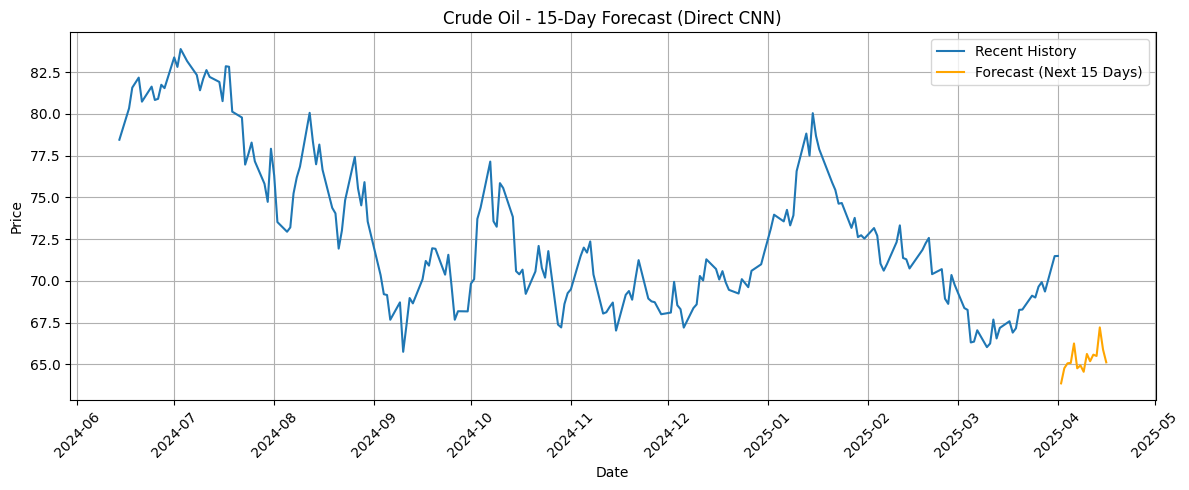


=== Processing: Natural Gas ===
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Metrics for Natural Gas:
  RMSE: 0.56
  MAE: 0.37
  R² Score: 0.9063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


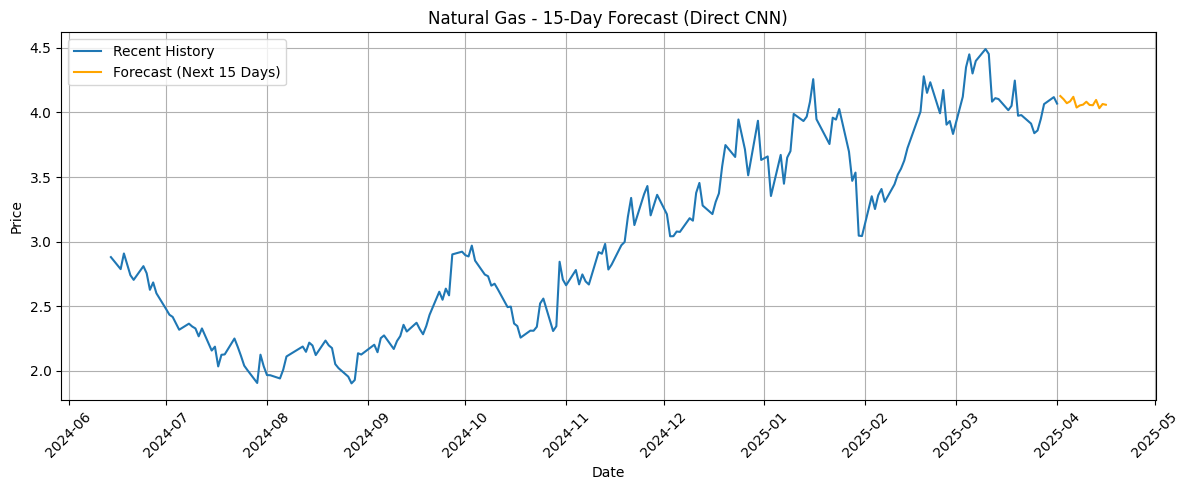

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
import datetime

# Load data
df = pd.read_csv('Futures_Resources_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Commodity columns
commodity_map = {
    'Crude Oil': 'CL=F_closing_price',
    'Natural Gas': 'NG=F_closing_price'
}

# Create sequences
def create_multistep_sequences(data, input_len=60, output_len=15):
    X, y = [], []
    for i in range(input_len, len(data) - output_len):
        X.append(data[i - input_len:i])
        y.append(data[i:i + output_len])
    return np.array(X), np.array(y)

# For each commodity
for label, col in commodity_map.items():
    print(f"\n=== Processing: {label} ===")
    data = df[[col]].dropna()
    values = data.values

    # Scaling
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(values)

    # Create input/output sequences
    input_len = 60
    output_len = 15
    X, y = create_multistep_sequences(scaled, input_len, output_len)

    # Train-test split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Reshape for Conv1D
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # CNN model
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_len, 1)),
        Dropout(0.2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(output_len)
    ])
    model.compile(optimizer='adam', loss='mae')

    # Train
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    # Predict and rescale
    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

    # Metrics
    mse = mean_squared_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
    r2 = r2_score(y_test_rescaled.flatten(), y_pred_rescaled.flatten())

    print(f"Metrics for {label}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R² Score: {r2:.4f}")

    # Forecast next 15 days
    last_seq = scaled[-input_len:].reshape(1, input_len, 1)
    forecast_scaled = model.predict(last_seq)[0]
    forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

    last_date = data.index[-1]
    forecast_dates = [last_date + datetime.timedelta(days=i) for i in range(1, output_len + 1)]

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(data.index[-200:], values[-200:], label='Recent History')
    plt.plot(forecast_dates, forecast, label='Forecast (Next 15 Days)', color='orange')
    plt.title(f"{label} - 15-Day Forecast (Direct CNN)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()



=== Processing: Crude Oil ===
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Metrics for Crude Oil:
  RMSE: 5.06
  MAE: 3.67
  R² Score: 0.9160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


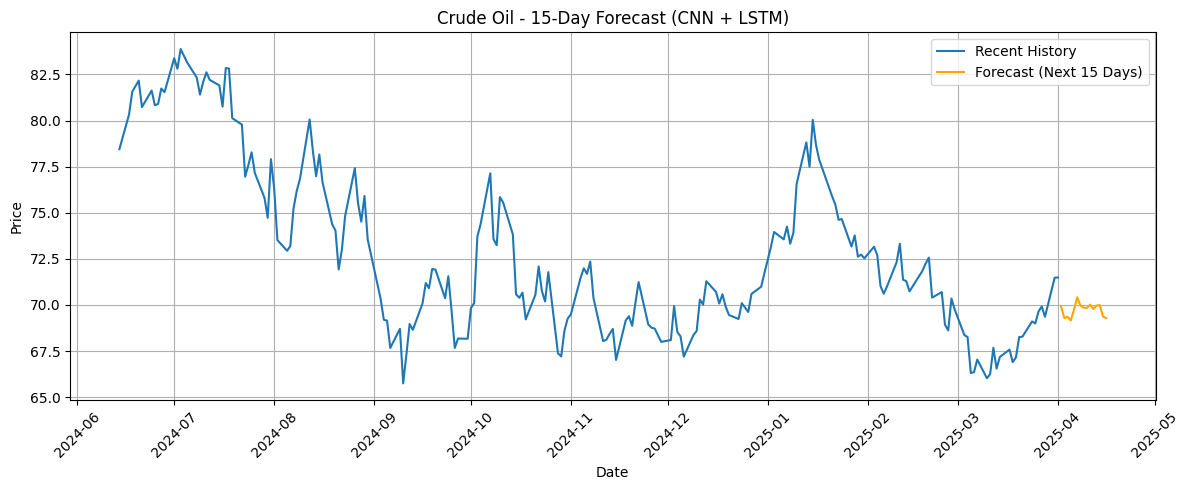


=== Processing: Natural Gas ===
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Metrics for Natural Gas:
  RMSE: 0.52
  MAE: 0.35
  R² Score: 0.9174
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


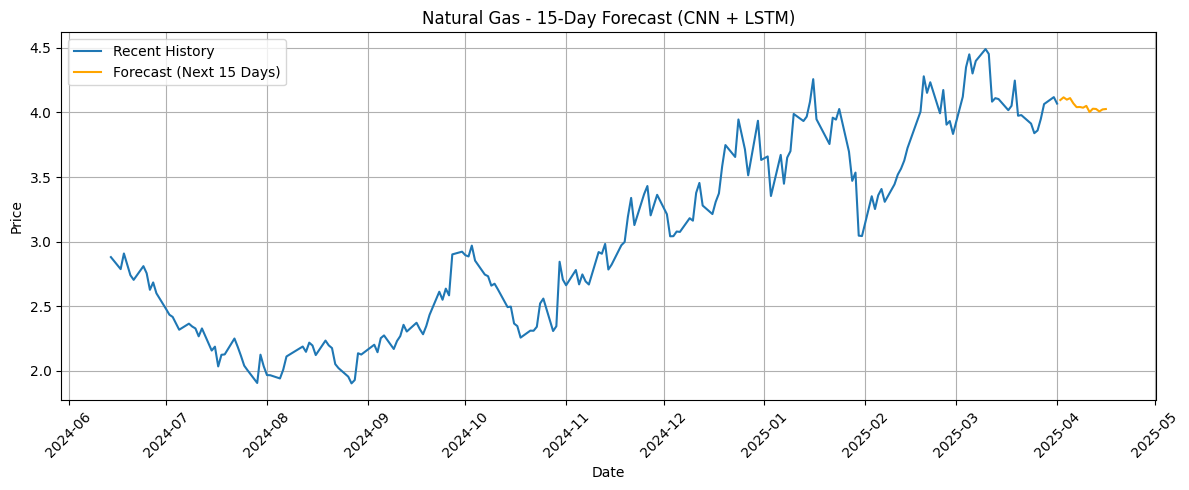

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
import datetime

# Load dataset
df = pd.read_csv('Futures_Resources_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Commodity map
commodity_map = {
    'Crude Oil': 'CL=F_closing_price',
    'Natural Gas': 'NG=F_closing_price'
}

# Sequence generator
def create_multistep_sequences(data, input_len=60, output_len=15):
    X, y = [], []
    for i in range(input_len, len(data) - output_len):
        X.append(data[i - input_len:i])
        y.append(data[i:i + output_len])
    return np.array(X), np.array(y)

# Forecast for each commodity
for label, col in commodity_map.items():
    print(f"\n=== Processing: {label} ===")

    data = df[[col]].dropna()
    values = data.values

    # Scale
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(values)

    # Sequence creation
    input_len = 60
    output_len = 15
    X, y = create_multistep_sequences(scaled, input_len, output_len)

    # Train-test split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Reshape for Conv1D and LSTM: [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], input_len, 1))
    X_test = X_test.reshape((X_test.shape[0], input_len, 1))

    # Build CNN + LSTM model
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_len, 1)),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(output_len)
    ])
    model.compile(optimizer='adam', loss='mae')

    # Train
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    # Predict
    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

    # Metrics
    mse = mean_squared_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
    r2 = r2_score(y_test_rescaled.flatten(), y_pred_rescaled.flatten())

    print(f"Metrics for {label}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R² Score: {r2:.4f}")

    # Forecast next 15 days
    last_seq = scaled[-input_len:].reshape(1, input_len, 1)
    forecast_scaled = model.predict(last_seq)[0]
    forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

    last_date = data.index[-1]
    forecast_dates = [last_date + datetime.timedelta(days=i) for i in range(1, output_len + 1)]

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(data.index[-200:], values[-200:], label='Recent History')
    plt.plot(forecast_dates, forecast, label='Forecast (Next 15 Days)', color='orange')
    plt.title(f"{label} - 15-Day Forecast (CNN + LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


Citations:
1. TensorFlow Documentation (https://www.tensorflow.org/api_docs/python/tf/keras)
2. Scikit Learn Documentation (https://scikit-learn.org/stable/)
3. J. Brownlee, “How to Develop LSTM Models for Time Series Forecasting,” Machine Learning Mastery, Nov. 2017.(https://www.machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)
4.https://www.analyticsvidhya.com/blog/2022/01/the-complete-lstm-tutorial-with-implementation/
4. S. Karra, “LSTM for Time Series Predictions,” Medium, Oct. 2020. (https://sailajakarra.medium.com/lstm-for-time-series-predictions-cc68cc11ce4f)
5. Talent500, “Time Series Forecasting with Long Short-Term Memory (LSTM) Networks in TensorFlow,” Talent500 Blog, Mar. 2023.(https://talent500.com/blog/time-series-forecasting-with-long-short-term-memory-lstm-networks-in-tensorflow/)
6. J. Brownlee, “Using CNN for Financial Time Series Prediction,” Machine Learning Mastery, May 2020. (https://www.machinelearningmastery.com/using-cnn-for-financial-time-series-prediction/)
7. J. Kaur, “Unlocking the Potential of Convolutional Neural Networks (CNNs) in Time Series Forecasting,” Medium, Jan. 2023. (https://thejaskiran99.medium.com/unlocking-the-potential-of-convolutional-neural-networks-cnns-in-time-series-forecasting-b2fac329e184)
8. A. Singh, “CNN Model for Time-Series Analysis,” Medium, Dec. 2023 (https://medium.com/@yashakash.singh7/cnn-model-for-time-series-analysis-3b58b4254790)
9. M. Rahman, “Different ways to combine CNN and LSTM networks for time series classification tasks,” Medium, Dec. 4, 2022. (https://medium.com/@mijanr/different-ways-to-combine-cnn-and-lstm-networks-for-time-series-classification-tasks-b03fc37e91b6)
10.  K. Mallya, “Deep Learning CNN & LSTM, Time Series Forecasting,” Kaggle, 2021. (https://www.kaggle.com/code/dkdevmallya/deep-learning-cnn-lstm-time-series-forecasting)
11.https://paperswithcode.com/paper/convolutional-lstm-network-a-machine-learning

=> We also utilized Generative AI tools (such as Chatgpt, Deepseek) to support certain aspects of the project such as drafting ideas, debugging code, and visualizing complex concepts.